<a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"><img src="https://archive.ics.uci.edu/ml/assets/logo.gif" width="400" align="center"></a>

<h1 align="center"><font size="5">Project: Automobile - Predict "Price"</font></h1>
<h2 align="center"><font size="5">Deadline: 2021-11-14 13:00:00 (Sunday)</font></h2>
<h3 align="center"><font size="5">Total marks: 2.0</font></h3>

### Your information:
- Fullname:
- Date of birth:
- Place of birth:
- Email:
- Mobile phone:

In this notebook, we practice all the knowledge and skills that we have learned in this course (LDS5: Data pre-processing and Analysis)

We apply the **Linear Regression Algorithm** to predict: **"price of car"** by accuracy evaluation methods.

Please read [Automobile information](https://archive.ics.uci.edu/ml/datasets/Automobile) carefully before you do this project!

Dataset: imports_85.csv

#### Attribute Information:
Attribute: Attribute Range
1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. **price: continuous from 5118 to 45400.**

### Requirements:

- Data exploration
- Data visualization
- Pre-processing: Feature selection/extraction
- Linear Regression
    - Model Evaluation using Test set
    - Report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import numpy as np


from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from scipy.stats.stats import pearsonr
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
missing_values = ['?','--','-','??','.']
df = pd.read_csv('imports_85.csv',names=headers,na_values = missing_values)

In [4]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [6]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

<AxesSubplot:>

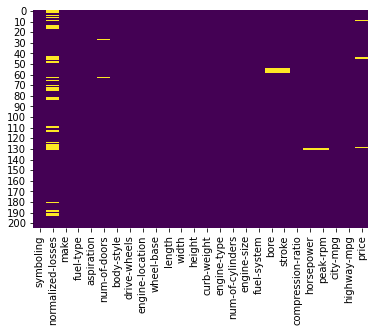

In [7]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [8]:
df['normalized-losses'] = df['normalized-losses'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['price'] = df['price'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['stroke'] = df['stroke'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['bore'] = df['bore'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['peak-rpm'] = df['peak-rpm'].interpolate(method = "linear"
                                      ,limit_direction = "both")

df['horsepower'] = df['horsepower'].interpolate(method = "linear"
                                      ,limit_direction = "both")

In [9]:
df['num-of-doors'].isna().sum()

2

In [10]:
df[['make','body-style']][df['num-of-doors'].isnull()==True]

,make,body-style
27,dodge,sedan
63,mazda,sedan


In [11]:
df['num-of-doors'][(df['body-style']=='sedan') & (df['make']=='mazda')]

53    four
54    four
60    four
62    four
63     NaN
65    four
66    four
Name: num-of-doors, dtype: object

In [12]:
df['num-of-doors'][(df['body-style']=='sedan') & (df['make']=='dodge')]

25    four
26    four
27     NaN
Name: num-of-doors, dtype: object

In [13]:
df['num-of-doors'] = df['num-of-doors'].fillna('four')

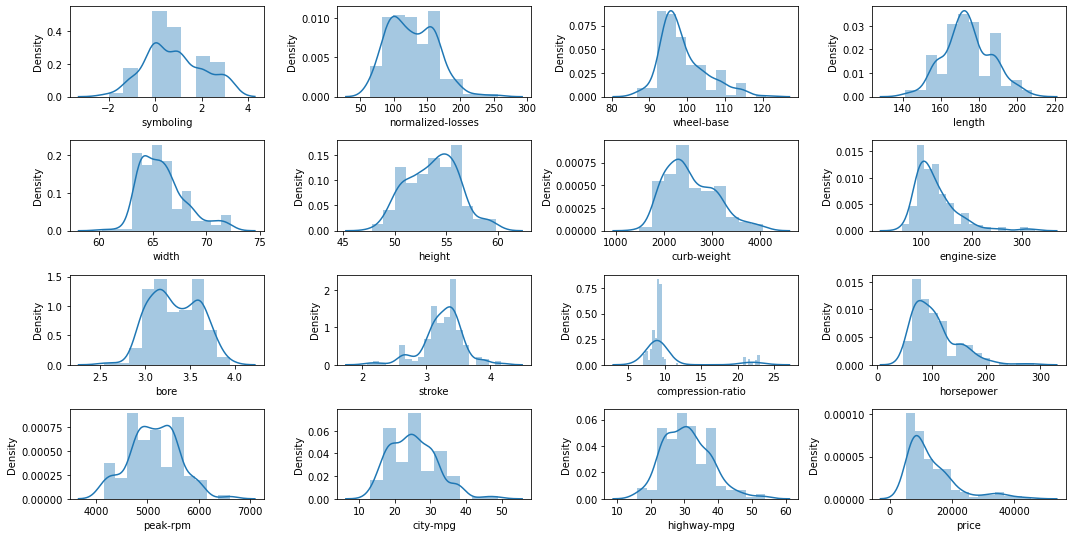

In [14]:
num_cols=df._get_numeric_data().columns
fig = plt.figure(figsize = (15,9))
for a,b in enumerate(num_cols):
    ax = fig.add_subplot(5,4,a+1)
    sns.distplot(df[b])
plt.tight_layout()

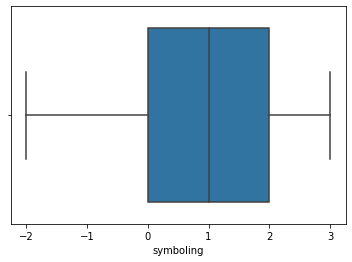

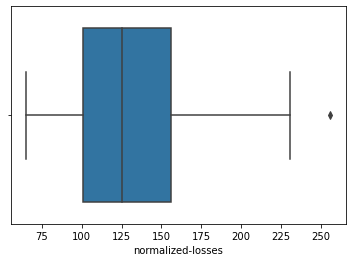

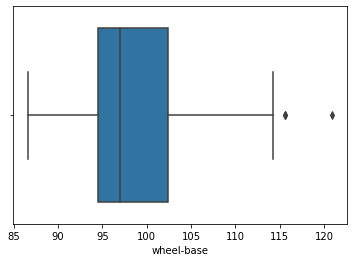

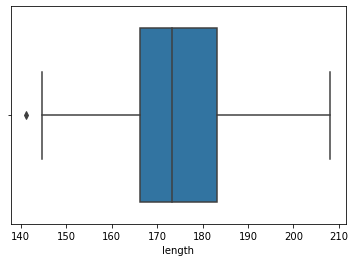

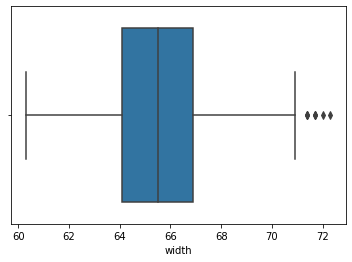

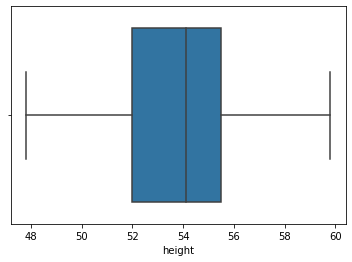

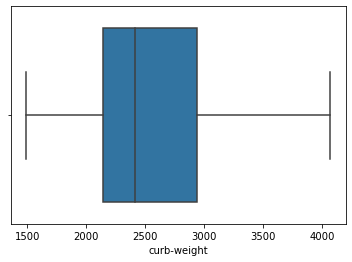

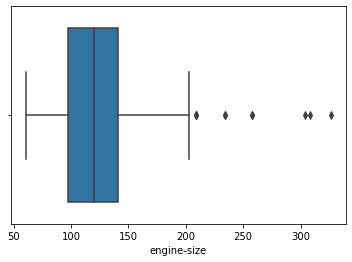

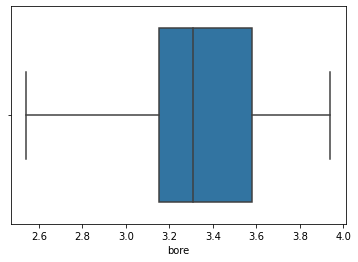

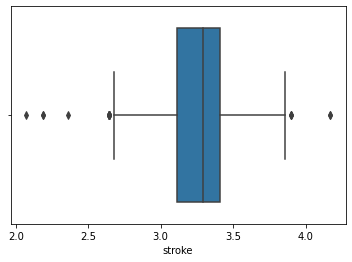

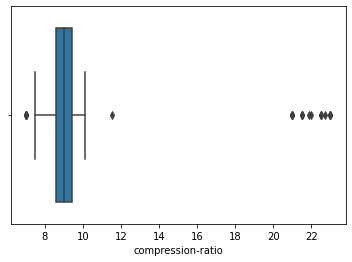

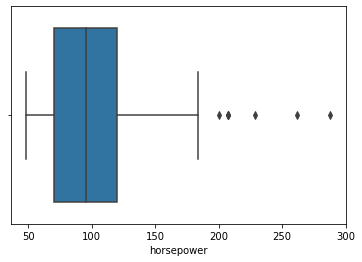

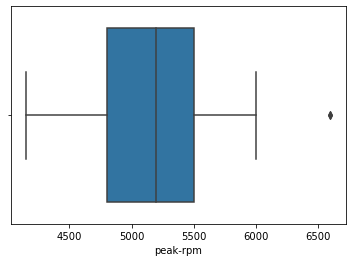

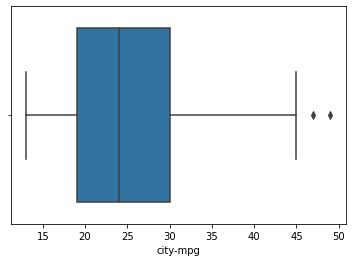

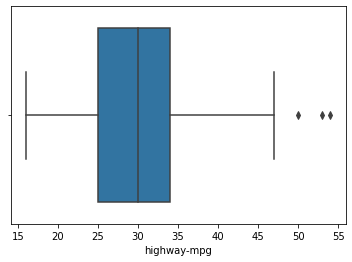

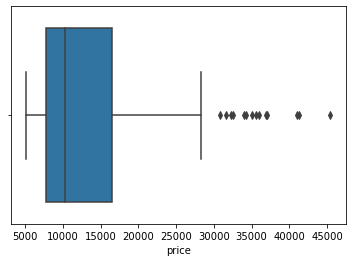

In [15]:
for col in num_cols:
    sns.boxplot(df[col])
    plt.show()

In [16]:
def outliers(df, num_cols):
    for col in num_cols:
        Q1=df[col].quantile(0.05)
        Q3=df[col].quantile(0.95)
        IQR=Q3-Q1
        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df.loc[df[col]<lower_bound, col]=lower_bound
        df.loc[df[col]>upper_bound, col]=upper_bound
    return df

In [17]:
df=outliers(df, num_cols)

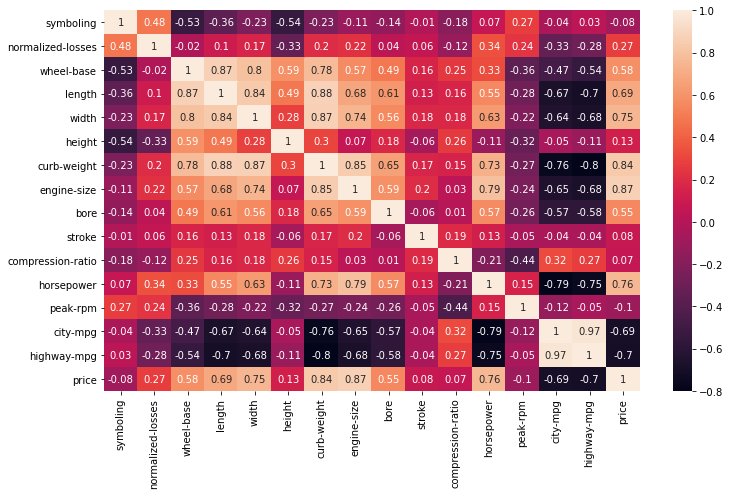

In [18]:
plt.figure(figsize=(12,7))

corr = df.corr()

corr = corr.round(2)

sns.heatmap(corr, cbar=True, annot = True);

In [19]:
X=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y=df[['price']]

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7,random_state=42)
lr = LinearRegression().fit(X_train, Y_train)
Yhat=lr.predict(X_test)

In [21]:
print("Y: \ntrain r2: {} \ntest r2: {}".format(lr.score(X_train, Y_train),lr.score(X_test, Y_test)))

Y: 
train r2: 0.8474119969199567 
test r2: 0.7170760093450613


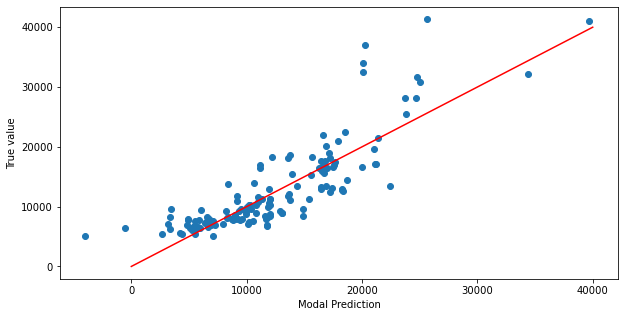

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(Yhat,Y_test)
plt.xlabel('Modal Prediction')
plt.ylabel('True value')
plt.plot([0,40000],[0,40000],'k-',color='r')


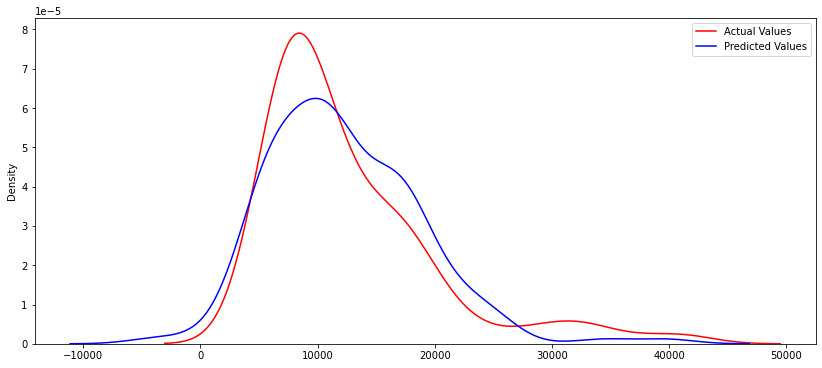

In [24]:
plt.figure(figsize=(14,6))
ax1=sns.distplot(Y_test,hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Predicted Values",ax=ax1)
plt.legend()
plt.show()